In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
df = pd.read_csv('exam.txt')
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [3]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [4]:
df.shape

(99, 3)

In [5]:
df.describe(include='all')

,c1,c2,res
count,99.000000,99.000000,99.000000
mean,65.957614,66.102779,0.606061
std,19.302009,18.638875,0.491108
min,30.058822,30.603263,0.000000
25%,51.297736,47.978125,0.000000
50%,67.319257,66.589353,1.000000
75%,80.234877,79.876423,1.000000
max,99.827858,98.869436,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
c1     99 non-null float64
c2     99 non-null float64
res    99 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [7]:
df.corr()

,c1,c2,res
c1,1.000000,-0.013538,0.565867
c2,-0.013538,1.000000,0.525289
res,0.565867,0.525289,1.000000


In [8]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

In [9]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (69, 2)
y.shape: (69,)
m: 69
n: 2
x.shape after appending a column for bias: (69, 3)


In [10]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[ 0.26288481],
        [ 1.37304109],
        [-1.3315204 ]]), (3, 1))

In [11]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [12]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.0926637960299717

In [13]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
J=0
iterations = 0
t = 10000
log = np.array([])
while(abs(J_prev-J) > 0.000001):
    z = np.matmul(x,w)
    h = 1/(1 + np.exp(-z))
    for i in range(n+1):
        temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[i,:] = temp[i]
    #print(w)
    #print(np.matmul(h-y,(h-y).T))
    J_prev = J
    w1 = np.log(1/(1 + np.exp(-z)))
    w2 = np.log(1-(1/(1 + np.exp(-z))))
    J = (-1/m)*np.sum(y*w1 + (1-y)*w2)
    #print(J)
    log = np.append(log, J)
    iterations+=1

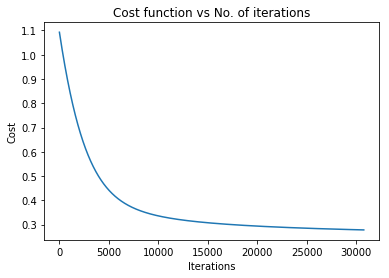

In [14]:
it = np.arange(iterations)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [15]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 0.27802232152135387


In [16]:
iterations

30771

In [17]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

30

In [18]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

100.0

# Using Regularisation

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [20]:
df = pd.read_csv('exam.txt')
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [21]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [22]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

In [23]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
lamda = 25
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (69, 2)
y.shape: (69,)
m: 69
n: 2
x.shape after appending a column for bias: (69, 3)


In [24]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[0.16994462],
        [0.37420854],
        [0.67175735]]), (3, 1))

In [25]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [26]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

0.48528755944930146

In [27]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
J=0
iterations = 0
t = 10000
log = np.array([])
while(abs(J_prev-J) > 0.00):
    z = np.matmul(x,w)
    h = 1/(1 + np.exp(-z))
    for i in range(n+1):
        temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0)) - alpha*lamda*(1/m)*w[i,:]
    for i in range(n+1):
        w[i,:] = temp[i]
    #print(w)
    #print(np.matmul(h-y,(h-y).T))
    J_prev = J
    w1 = np.log(1/(1 + np.exp(-z)))
    w2 = np.log(1-(1/(1 + np.exp(-z))))
    J = (-1/m)*np.sum(y*w1 + (1-y)*w2) + (1/(2*m))*lamda*np.sum(np.multiply(w,w))
    #print(J)
    log = np.append(log, J)
    iterations+=1

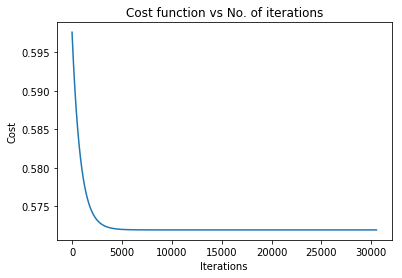

In [28]:
it = np.arange(iterations)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [29]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 0.571927941419474


In [30]:
iterations

30505

In [31]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

28

In [32]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

93.33333333333333

# Using Newtons Method

In [34]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import timeit
df = pd.read_csv('exam.txt')
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [35]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [36]:
df.shape

(99, 3)

In [37]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

In [38]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
#x = np.reshape(x,(x.shape[1],x.shape[0]))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (69, 2)
y.shape: (69,)
m: 69
n: 2
x.shape after appending a column for bias: (69, 3)


In [39]:
w = np.zeros((n+1,1))
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [40]:
delta_J = np.zeros((x.shape[1],1))
for i in range(1,m):
    z = np.matmul(x[i],w)
    h = 1/(1 + np.exp(-z))
    x_dum = x[i]
    x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
    x_dum = (h-y[i])*x_dum
    delta_J = np.add(delta_J , x_dum)

print(x.shape)
print(y.shape)
print(delta_J)
print(delta_J.shape)


(69, 3)
(69, 1)
[[ -9.        ]
 [-18.92671173]
 [-19.31364517]]
(3, 1)


In [46]:
m
print(w.shape)

(3, 1)


In [ ]:
df = pd.read_csv('exam.txt', names = ['exam1', 'exam2', 'adm'])
y = df['adm'].values
X = df.drop(['adm'], axis=1).values
msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]
#Normalizing
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))
#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)

In [42]:
J_prev = 100
iterations = 0
log = np.array([])
while(iterations<100 ):
    Hessian = np.zeros((n+1,n+1))
    for i in range(1,m):
        z = np.matmul(x[i],w)
        h = 1/(1 + np.exp(-z))
        x_dum = x[i]
        x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
        Hessian =  np.add(Hessian,(h*(1-h)*np.dot(x_dum,x_dum.T)))
    delta_j = np.zeros((x.shape[1],1))
    for i in range(1,m):
        z = np.matmul(x[i],w)
        h = 1/(1 + np.exp(-z))
        x_dum = x[i]
        x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
        x_dum = (h-y[i])*x_dum
        delta_J = np.add(delta_J , x_dum)
    Hessian_inv = inv(Hessian)
    w = np.subtract(w,np.matmul(Hessian_inv,delta_J))
    print(" w = " , w)
    #w = w_new
    z = np.dot(x,w)
    J_prev = J
    #print(" z = ",z)
    #w1 = np.log(1/(1 + np.exp(-z)))
    #w2 = np.log(1-(1/(1 + np.exp(-z))))
    #J  = (-1/m)*np.sum(y*w1 + (1-y)*w2)
    #print(" J = " , J)
    
    #print(J)
    log = np.append(log, J)
    iterations+=1

 w =  [[0.82618925]
 [2.01431553]
 [2.15655569]]
 w =  [[13.344697  ]
 [23.79465337]
 [27.74033272]]
 w =  [[14097.81608259]
 [24342.7144044 ]
 [28330.50958332]]


/home/subtleseeker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/home/subtleseeker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


LinAlgError: Singular matrix

In [ ]:
iterations

In [43]:
#it = np.arange(iterations)
#plt.plot(it, log)
#plt.xlabel('Iterations')
#plt.ylabel('Cost')
#plt.title('Cost function vs No. of iterations')
#plt.show()

In [44]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


25

In [45]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

83.33333333333334